### Final Project: Digit Recognizer Competition
#### Team Members: Paula Palles, Aaron Amankwaah, Nikhil Pandey

Our goal is to go out of the scope of the class using the MNIST dataset. This is a simple digit dataset that we want to use to try many different classification models to benchmark them. Our goal is to use Neural Networks, SVMs, and K-Nearest Neighbor with different parameters to see how the parameters affect the final result.

For **K-Nearest Neighbors**, we will focus on the K-Neighbors parameter.

For **Support Vector Machines**...

For **Neural Networks**, we will focus on using sequential and convulation neural networks to compare them. We will also train our model with different amounts of hidden layers. For the scope of this project, we will use base-8 outputs (will be more aparent during the code). We will also look at runtime differences between GPU and CPU training. Finally, we will test how batch size and epoches affect the final result.

Our goal at the end of all the models is to be able to generate a through report of the models by comparing them and also integrating our models with a live canvas where users can input their own hand drawn numbers and immediately see the result from our models.

Dataset was obtained through Kaggle: https://www.kaggle.com/competitions/digit-recognizer


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand

### Cleaning and Exploratory Data Analysis

Our goal is to get the data and verify its contents. Specifically we are looking to check for data types and nulls. We are also looking to visualize different aspects of the data with the goal of better understanding it. After that is done, we want to take the appropirate actions to clean and format the dataset to prepare it for our models.

In [42]:
data = pd.read_csv('./data/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Gets types of first 5 columns
print("Data Types Head:", str(list(data.dtypes)[0:5]))

Data Types Head: [dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64')]


In [44]:
# Verifies all columns are integers
flag = True
for col in data.dtypes:
    if str(col) != 'int64':
        flag = False
print("All Columns are Integers: " + str(flag))

All Columns are Integers: True


In [45]:
# Makes sure there are no nulls
print("Total Nulls:", data.isna().sum().sum())

Total Nulls: 0


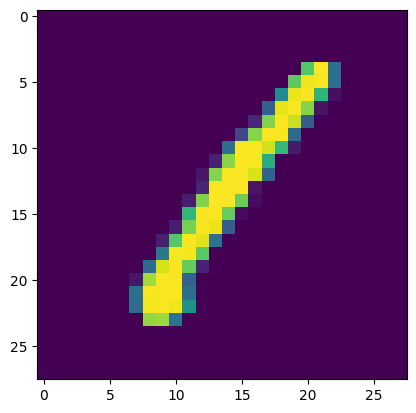

In [46]:
# Displays the first digit from the data
plt.imshow(data.iloc[0,1:].values.reshape(28,28))

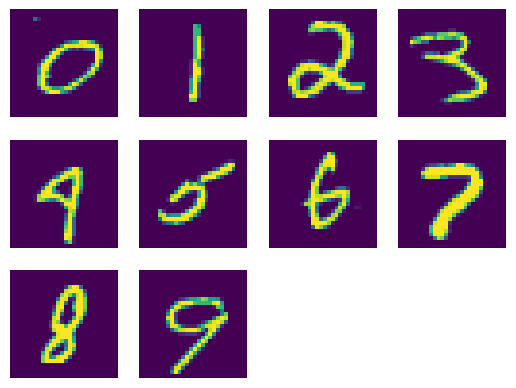

In [47]:
for i in range(10):
    digit_data = data[data.label == i]
    digit_data = digit_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
    plt.subplot(3, 4, i + 1)
    plt.imshow(digit_data.values.reshape(28, 28))
    plt.axis('off')

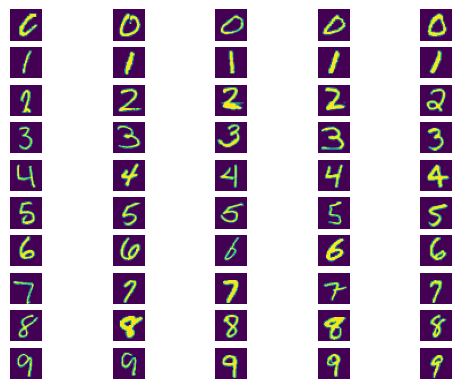

In [48]:
for i in range(10):
    digit_all_data = data[data.label == i]
    for j in range(5):
        digit_data = digit_all_data.iloc[rand.randint(0, digit_data.shape[0]), 1:]
        plt.subplot(10, 5, i * 5 + j + 1)
        plt.imshow(digit_data.values.reshape(28, 28))
        plt.axis("off")

Text(0.5, 1.0, 'Digit Count')

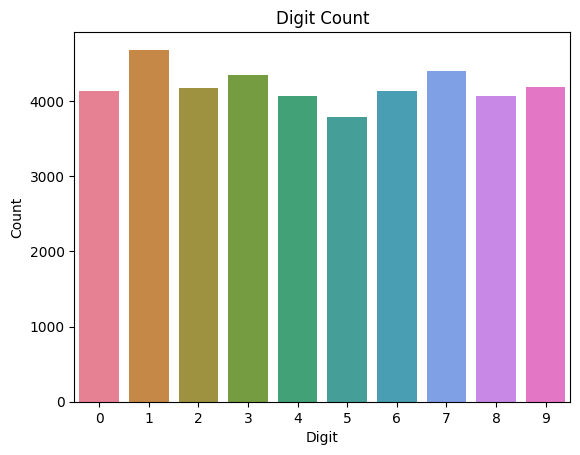

In [49]:
plot = sns.barplot(x=list(data.label.value_counts().index), y=list(data.label.value_counts().values), palette='husl')
plot.set(xlabel='Digit', ylabel='Count')
plot.set_title('Digit Count')

### Splitting Data

The data needs to be split and we will be using a 70:30 ratio for this. The goal is to verify that the data is balanced.

In [50]:
from sklearn.model_selection import train_test_split

# Random seed for reproducibility
rand_seed = 123
np.random.seed(rand_seed)

# Splits the data into training and validation sets
train, test = train_test_split(data, test_size=0.3, random_state=rand_seed)

In [51]:
# Resets the index of the data
train = train.reset_index(drop=True)

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29396,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29397,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29398,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Resets the index of the data
test = test.reset_index(drop=True)

test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12596,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12597,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12598,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Digit Count')

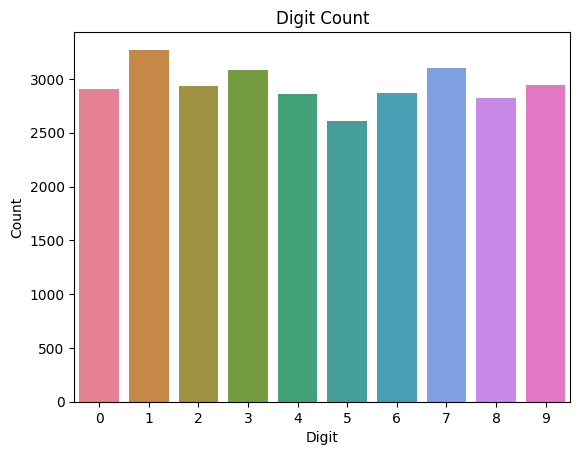

In [53]:
# Verifies that the training set is balanced
plot = sns.barplot(x=list(train.label.value_counts().index), y=list(train.label.value_counts().values), palette='husl')
plot.set(xlabel='Digit', ylabel='Count')
plot.set_title('Digit Count')

### Preprocessing Data

The data needs to be preprocessed and loaded as a tensor for deep learning. A tensor is a algebraic object that describe relationships. They can map between objects like vectors, scalars, and other tensors. For our case we are mapping vectors of data into scalars. We will use the Dataset class which stores our values into tensors preparing it for batch training.

In [54]:
import torch
from torch.utils.data import Dataset, DataLoader

In [55]:
# This class represents the dataset
class DigitDataset(Dataset):
    def __init__(self, data):
        # Data is converted to a numpy array which is used to create the tensor
        self.x = torch.from_numpy(data.iloc[:, 1:].to_numpy().astype(np.float32))
        self.y = torch.from_numpy(data.iloc[:, 0].to_numpy())
        
        # The number of rows in the data
        self.n_samples = data.shape[0]
    
    # For indexing the dataset
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # For getting the length of the dataset
    def __len__(self):
        return self.n_samples

In [56]:
trainset = DigitDataset(train)

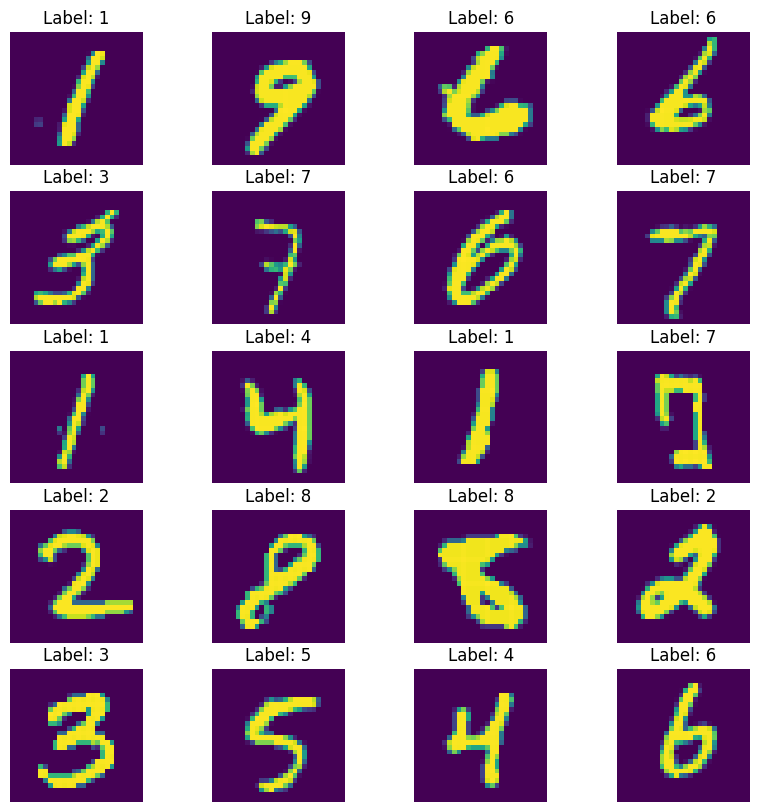

In [57]:
plt.figure(figsize=(10, 10))
for i in range(20):
    x, y = trainset[rand.randint(0, trainset.n_samples)]
    plt.subplot(5, 4, i + 1)
    plt.title("Label: " + str(y.item()))
    plt.imshow(x.reshape(28, 28))
    plt.axis("off")

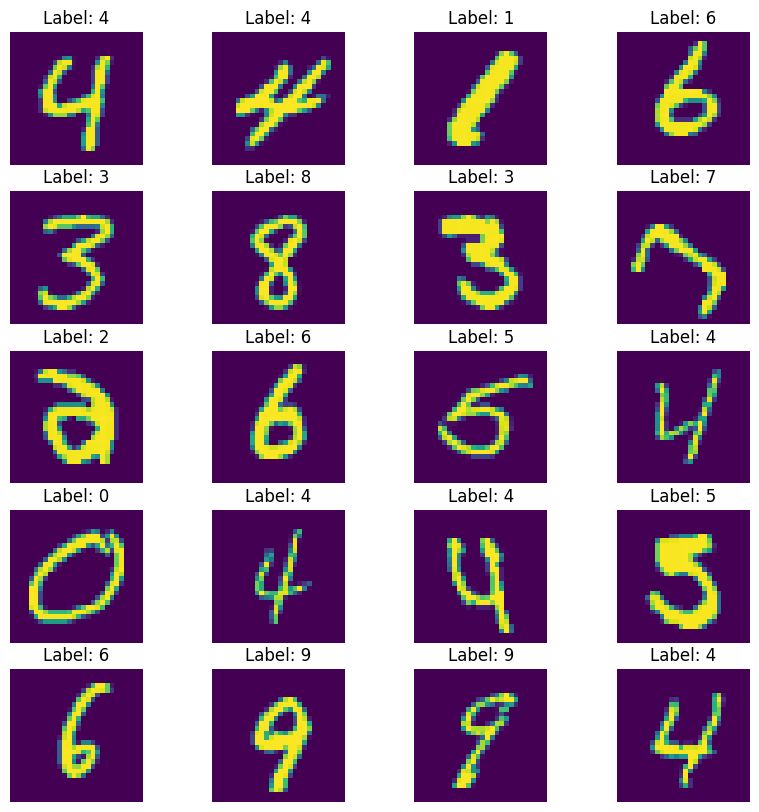

In [58]:
testset = DigitDataset(test)

plt.figure(figsize=(10, 10))
for i in range(20):
    x, y = testset[rand.randint(0, testset.n_samples)]
    plt.subplot(5, 4, i + 1)
    plt.title("Label: " + str(y.item()))
    plt.imshow(x.reshape(28, 28))
    plt.axis("off")

In [59]:
# This loads the data into batches
batch_num = 10
loaded_train = DataLoader(dataset=trainset, batch_size=batch_num, shuffle=True)

### Creating the Neural Network

We need to define the model before we can use it. We will create a basic sequential network network which has an input layer taking in a flatten 28 * 28 pixel data from the images and then passing it to two hidden layers with 64 inputs and outputs before eaching the output layer with an output of 10 with each representing a different digit. We will also use a rectified linear activation function because it is most popularly used. Finally we will use a log_softmax which will log the probability and then take the highest probability as the result.

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [61]:
# Defines the neural network model
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Creates the input layer
        self.fc1 = nn.Linear(28 * 28, 64)
        
        # Our hidden layers
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        
        # Our output layer
        self.fc4 = nn.Linear(64, 10)
    
    # This passes data forward through the network
    def forward(self, x):
        # Data is passed through each layer using the relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        # The last one doesn't use the relu function because it is the output layer
        x = self.fc4(x)
        
        # Logs the probability of each digit and returns the result with the highest probability
        return F.log_softmax(x, dim=1)

# Creates a new instance of the network
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [62]:
# Randomly created tensor with the same dim as real data for testing
x = torch.rand((28, 28))
x = x.view(-1, 28 * 28)
x.shape

torch.Size([1, 784])

In [63]:
# Tests if data is passed through the network properly
print(net(x))

tensor([[-2.1815, -2.3037, -2.2712, -2.3335, -2.2933, -2.1720, -2.4041, -2.3205,
         -2.3387, -2.4397]], grad_fn=<LogSoftmaxBackward0>)


### Train the Dataset

We will use an optimizer to calculate the gradients to update the neural network.

In [64]:
import torch.optim as optim

# The adam optimizer is one type of algorithm used to train and update the weights
learning_rate = 0.001
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# Number of iterations over the entire dataset
EPOCHS = 3

# This is the training loop
for epoch in range(EPOCHS):
    # Loads the data in batches
    for data in loaded_train:
        # Seperates the data into features vs targets
        x, y = data
        
        # Resets the gradients for the next iteration
        net.zero_grad()
        
        # Runs the data through the network
        output = net(x.view(-1, 28 * 28))
        
        # Calculates the loss using the output
        loss = F.nll_loss(output, y)
        
        # Computes the gradients based on the loss
        loss.backward()
        
        # Actually updates the weights
        optimizer.step()    
    print("Current Loss", loss)

Current Loss tensor(0.6506, grad_fn=<NllLossBackward0>)
Current Loss tensor(0.1378, grad_fn=<NllLossBackward0>)
Current Loss tensor(0.2398, grad_fn=<NllLossBackward0>)


In [65]:
def get_acc(network, dataset):
    correct = 0
    total = 0
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            
            # Puts features through the network
            output = network(x.view(-1, 28 * 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                total += 1
    # Returns accuracy
    return correct/total

In [66]:
def get_failed(network, dataset):
    correct = 0
    total = 0
    failed = []
    # No need to calculate gradients for getting accuracy
    with torch.no_grad():
        for data in dataset:
            # Gets the features and targets
            x, y = data
            
            # Puts features through the network
            output = network(x.view(-1, 28 * 28))
            
            # Gets each output and compares it to the target
            for idx, i in enumerate(output):
                # Counter for accuracy
                if torch.argmax(i) == y:
                    correct += 1
                else:
                    failed.append((x, y, torch.argmax(i)))
                total += 1
    # Returns accuracy
    return correct/total, failed

In [67]:
train_acc, train_failed = get_failed(net, trainset)
print("Train Set Accuracy:", train_acc)

Train Set Accuracy: 0.9579251700680272


In [68]:
test_acc, test_failed = get_failed(net, testset)
print("Test Set Accuracy:", test_acc)

Test Set Accuracy: 0.9468253968253968


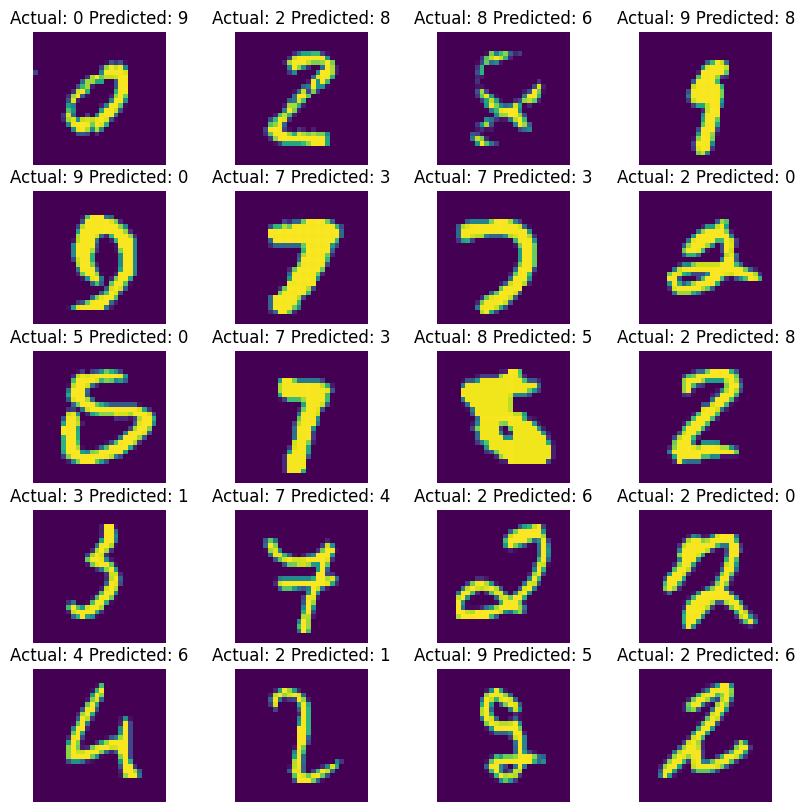

In [69]:
plt.figure(figsize=(10, 10))
for i in range(20):
    failed_random = rand.randint(0, len(train_failed))
    failed_random = train_failed[failed_random]
    
    plt.subplot(5, 4, i + 1)
    plt.imshow(failed_random[0].reshape(28, 28))
    plt.title("Actual: " + str(failed_random[1].item()) + " Predicted: " + str(failed_random[2].item()))
    plt.axis("off")

In [70]:
def failed_freq(fails):
    actual_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    pred_freq = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for fail in fails:
        actual_freq[fail[1].item()] += 1
        pred_freq[fail[2].item()] += 1
    return actual_freq, pred_freq

Text(0.5, 1.0, 'Actual Failed Frequency')

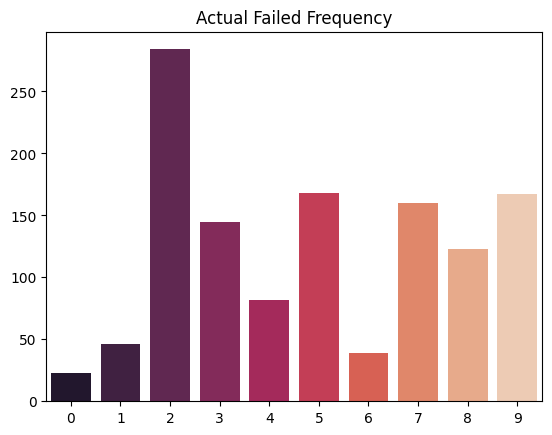

In [83]:
actual_freq, pred_freq = failed_freq(train_failed)
sns.barplot(x=list(range(10)), y=actual_freq, palette="rocket")
plt.title("Actual Failed Frequency")

Text(0.5, 1.0, 'Predict Failed Frequency')

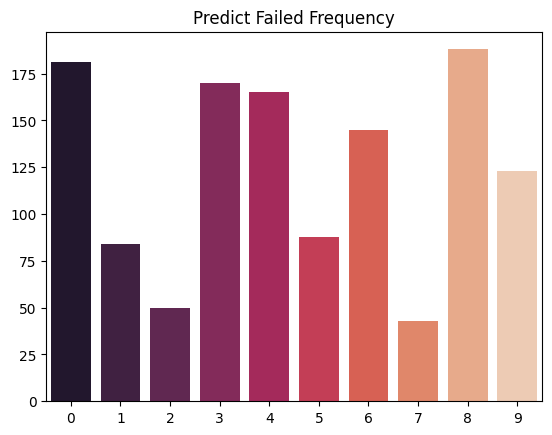

In [84]:
sns.barplot(x=list(range(10)), y=pred_freq, palette="rocket")
plt.title("Predict Failed Frequency")